## Exploratory Data Analysis

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile

from src.fraud import get_ticket_info, preprocessing, trimvars

In [88]:
# Unzip data and put contents into the main data folder of repo
with zipfile.ZipFile('./data/data.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

In [89]:
raw = pd.read_json('data/data.json')
raw.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [109]:
# Check the Output Column
raw.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [110]:
# Create a new Output column that is either 0 or 1
raw['fraud'] = raw.acct_type.apply(lambda x: ('fraud' in x)*1)
raw.fraud.value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [127]:
d, n = raw.fraud.value_counts()
print("Fraud Rate: ", n/(n+d))

Fraud Rate:  0.09018623142916929


In [8]:
raw.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [12]:
# Check to see if our data has any missing values
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

## Start to look into variables and see whether they can be used as predictors

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


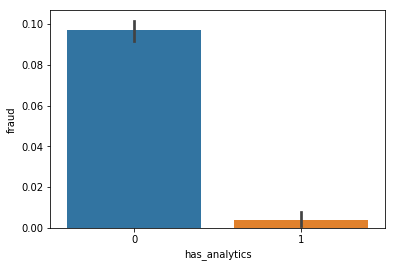

In [34]:
sns.barplot(raw.has_analytics,raw.fraud)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


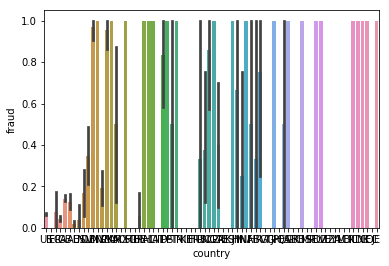

In [13]:
sns.barplot(raw.country,raw.fraud)

In [35]:
raw[raw['fraud']==1].groupby('country').agg({'fraud':'sum'})

,fraud
country,
,40
A1,25
AR,4
AU,15
BE,1
BG,3
CA,53
CH,6
CI,9


In [120]:
raw[raw['fraud']==1].groupby('sale_duration').agg({'fraud':'sum'})

,fraud
sale_duration,
-1094.0,1
-19.0,1
-3.0,2
-1.0,5
0.0,155
1.0,222
2.0,124
3.0,79
4.0,98


In [123]:
raw.groupby('sale_duration').agg({'fraud':'count'})

,fraud
sale_duration,
-1094.0,1
-143.0,1
-86.0,1
-37.0,1
-36.0,1
-28.0,1
-24.0,1
-19.0,1
-13.0,1


In [125]:
raw[raw['fraud']==1].groupby('user_age').agg({'fraud':'sum'})

,fraud
user_age,
0,725
1,36
2,26
3,13
4,17
5,19
6,16
7,14
8,10


In [126]:
raw.groupby('user_age').agg({'fraud':'count'})

,fraud
user_age,
0,2745
1,199
2,103
3,78
4,58
5,71
6,52
7,64
8,49


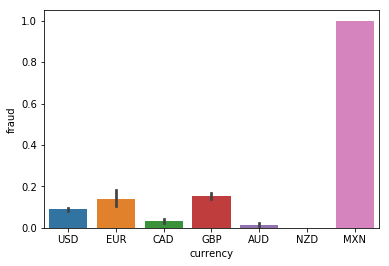

In [22]:
sns.barplot(raw.currency,raw.fraud)

In [23]:
raw.currency.value_counts()

USD    9696
GBP    2222
CAD    1322
AUD     779
EUR     262
NZD      55
MXN       1
Name: currency, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


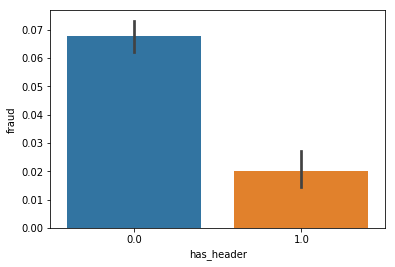

In [35]:
sns.barplot(raw.has_header,raw.fraud)

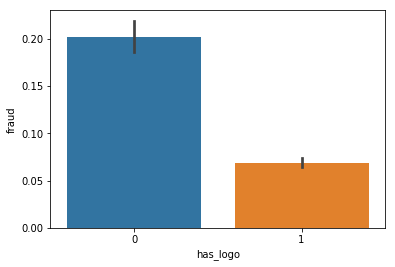

In [36]:
sns.barplot(raw.has_logo,raw.fraud)

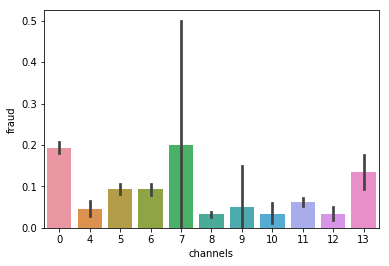

In [38]:
sns.barplot(raw.channels,raw.fraud)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


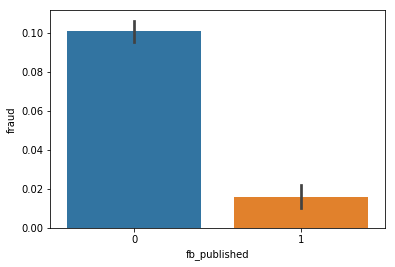

In [39]:
sns.barplot(raw.fb_published,raw.fraud)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


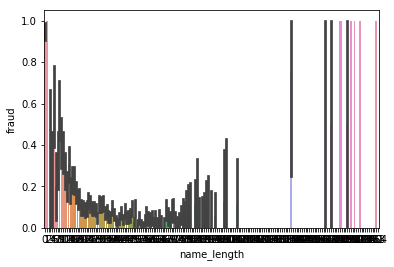

In [40]:
sns.barplot(raw.name_length,raw.fraud)

In [34]:
raw[raw['fraud']== 1].groupby('name_length').agg({'fraud':'sum'})

,fraud
name_length,
0,81
1,1
3,2
4,3
5,14
6,5
7,14
8,26
9,27


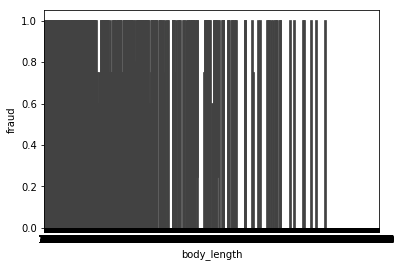

In [37]:
sns.barplot(raw.body_length,raw.fraud)

In [38]:
raw[raw['fraud']== 1].groupby('body_length').agg({'fraud':'sum'})

,fraud
body_length,
0,330
10,1
11,1
12,1
14,1
15,5
16,1
17,3
18,1


In [40]:
raw.groupby('body_length').agg({'fraud':'count'})

,fraud
body_length,
0,829
10,2
11,4
12,1
14,3
15,6
16,2
17,3
18,2


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


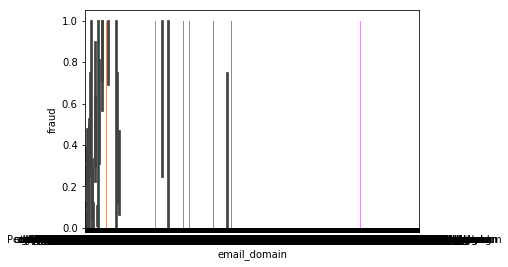

In [41]:
sns.barplot(raw.email_domain,raw.fraud)

In [42]:
raw[raw['fraud']== 1].groupby('email_domain').agg({'fraud':'sum'})

,fraud
email_domain,
126.com,2
19sieunhan.com,3
31and7.com,1
4asdkids.com,1
4u2nv-ent.com,3
9and1.biz,4
DionJordan.com,1
GMAIL.COM,2
Safe-mail.net,3


In [43]:
raw.groupby('email_domain').agg({'fraud':'count'})

,fraud
email_domain,
.com,11
10-12businessclub.co.uk,1
1015.com,4
101cs.co.uk,1
1121.us,1
126.com,2
1313main.com,1
140ventures.com,1
1415broad.ca,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


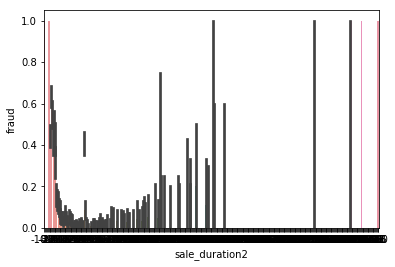

In [6]:
sns.barplot(raw.sale_duration2,raw.fraud)

In [121]:
raw[raw['fraud']==1].groupby('sale_duration2').agg({'fraud':'sum'})

,fraud
sale_duration2,
-1094,1
-19,1
-1,5
0,151
1,226
2,126
3,76
4,98
5,73


In [122]:
raw.groupby('sale_duration2').agg({'fraud':'count'})

,fraud
sale_duration2,
-1094,1
-86,1
-37,1
-28,1
-24,1
-19,1
-1,5
0,340
1,355


In [51]:
raw.ticket_types[0]

[{'event_id': 527017,
  'cost': 25.0,
  'availability': 1,
  'quantity_total': 800,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 50.0,
  'availability': 1,
  'quantity_total': 100,
  'quantity_sold': 0},
 {'event_id': 527017,
  'cost': 550.0,
  'availability': 1,
  'quantity_total': 20,
  'quantity_sold': 0}]

## Potential variables
    
    country
    has_analytics
    has_logo
    fb_published
    name_length
    user_type
    body_length 0 or more
    ticket_types has a lot of information will look into grabbing this

In [79]:
# Test the Function
get_ticket_info(raw).head()

,cost min,cost max,quantity_total sum,ticket_tiers_num
0,25.00,550.00,920.0,3
1,35.00,35.00,100.0,2
2,93.51,93.51,48.0,1
3,5.00,25.00,30000.0,6
4,36.00,200.00,264.0,8


In [113]:
# Quick test to see if we got what we want and to verify there are no missing values
test = preprocessing(raw)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 88 columns):
fraud                 14337 non-null int64
has_analytics         14337 non-null int64
has_logo              14337 non-null int64
fb_published          14337 non-null int64
name_length           14337 non-null int64
                      14337 non-null uint8
A1                    14337 non-null uint8
AE                    14337 non-null uint8
AR                    14337 non-null uint8
AT                    14337 non-null uint8
AU                    14337 non-null uint8
BB                    14337 non-null uint8
BE                    14337 non-null uint8
BG                    14337 non-null uint8
BS                    14337 non-null uint8
CA                    14337 non-null uint8
CH                    14337 non-null uint8
CI                    14337 non-null uint8
CM                    14337 non-null uint8
CN                    14337 non-null uint8
CO                    14337 non

In [114]:
test.dtypes[test.dtypes == np.object]

Series([], dtype: object)

In [115]:
# Only Keep variables that have a correlation with our output
trim = trimvars(test,'fraud')

In [116]:
test = test[trim]

In [117]:
test.corr()

,fraud,has_analytics,has_logo,fb_published,name_length,A1,AU,CA,CH,CI,...,US,VN,user_1,user_3,user_4,body_0,cost min,cost max,quantity_total sum,ticket_tiers_num
fraud,1.000000,-0.084626,-0.169485,-0.099143,-0.158447,0.132747,-0.057067,-0.052265,0.064990,0.079604,...,-0.108721,0.145063,0.327721,-0.186842,-0.123113,0.266270,0.067525,0.021834,0.045338,-0.079066
has_analytics,-0.084626,1.000000,0.005392,0.070408,0.052419,-0.011731,0.022767,0.011202,-0.005743,-0.007035,...,-0.033784,-0.013275,-0.102571,0.076672,0.019517,-0.062642,0.038788,0.018428,-0.004210,0.059415
has_logo,-0.169485,0.005392,1.000000,0.048474,0.110060,-0.018577,0.030368,0.029897,-0.019195,-0.027330,...,-0.041080,-0.040316,-0.037346,-0.025851,0.067770,-0.227070,-0.019282,0.003961,0.006905,0.030786
fb_published,-0.099143,0.070408,0.048474,1.000000,0.081675,-0.015972,0.007974,-0.027183,-0.007819,-0.009578,...,0.038570,-0.018075,-0.086399,0.040506,0.044407,-0.072268,-0.025465,-0.005974,-0.006397,0.033797
name_length,-0.158447,0.052419,0.110060,0.081675,1.000000,-0.029002,0.001034,0.019420,-0.023971,-0.012225,...,0.039604,-0.058154,-0.095427,0.039959,0.058089,-0.191331,0.017938,0.015342,0.095170,0.060007
A1,0.132747,-0.011731,-0.018577,-0.015972,-0.029002,1.000000,-0.009764,-0.012985,-0.000855,-0.001047,...,-0.056221,-0.001977,0.051338,-0.040549,-0.009273,0.032621,0.015873,0.002551,-0.000834,-0.011476
AU,-0.057067,0.022767,0.030368,0.007974,0.001034,-0.009764,1.000000,-0.072581,-0.004780,-0.005855,...,-0.314264,-0.011050,-0.005348,0.004923,-0.000110,-0.022803,0.024112,-0.005856,-0.003523,-0.024043
CA,-0.052265,0.011202,0.029897,-0.027183,0.019420,-0.012985,-0.072581,1.000000,-0.006357,-0.007786,...,-0.417918,-0.014694,-0.001140,-0.010816,0.013547,-0.018955,0.015809,-0.008134,0.044976,-0.004185
CH,0.064990,-0.005743,-0.019195,-0.007819,-0.023971,-0.000855,-0.004780,-0.006357,1.000000,-0.000513,...,-0.027525,-0.000968,0.034455,-0.021491,-0.010563,0.067985,-0.004788,-0.002860,-0.000412,-0.009917
CI,0.079604,-0.007035,-0.027330,-0.009578,-0.012225,-0.001047,-0.005855,-0.007786,-0.000513,1.000000,...,-0.033714,-0.001185,0.042203,-0.026323,-0.012939,0.029584,0.015396,0.004617,-0.000503,-0.002356


## Now we can move on to modeling we will use the following variables

In [118]:
trim

['fraud',
 'has_analytics',
 'has_logo',
 'fb_published',
 'name_length',
 'A1',
 'AU',
 'CA',
 'CH',
 'CI',
 'CZ',
 'DZ',
 'GB',
 'ID',
 'KH',
 'MA',
 'NG',
 'PH',
 'PK',
 'US',
 'VN',
 'user_1',
 'user_3',
 'user_4',
 'body_0',
 'cost min',
 'cost max',
 'quantity_total sum',
 'ticket_tiers_num']